In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pro = pd.read_csv('data/properties.csv')
train = pd.read_csv('data/train.csv')
cpi = pd.read_csv('data/cpi.csv')
interest= pd.read_csv('data/interest.csv')
rentIndex = pd.read_csv('data/rentIndex.csv')
geo = pd.read_csv('data/geo_attributes.csv')
vacant = pd.read_csv('data/vacant.csv')
test = pd.read_csv('data/test.csv') 

#  Interest + Cpi

In [3]:
interest_and_cpi = pd.merge(left=interest, right=cpi, on='Data Series')
interest_and_cpi.head()

,Data Series,InterestRate,CPI
0,2022 Dec,1.48,111.186
1,2022 Nov,1.47,110.959
2,2022 Oct,1.17,109.893
3,2022 Sep,1.03,110.339
4,2022 Aug,0.95,109.863


# rentIndex + vacant

In [4]:
rentindex_and_vacant = pd.merge(left=rentIndex, right=vacant, on='Data Series')
rentindex_and_vacant.head()

,Data Series,RentIndex,Available,Vacant
0,2022 4Q,148.1,34084,524
1,2022 3Q,137.9,34084,514
2,2022 2Q,127.0,34084,452
3,2022 1Q,119.0,34084,517
4,2021 4Q,114.2,34084,576


available -> Completed units ready for occupation, ( including both occupied and unoccupied units ). Data covers all completed executive condominiums with a temporary occupation permit, or a certificate of statutory completion.

vacant -> Available units that are not currently occupied 

create occupied and unoccupied according to available and vacant

In [5]:
rentindex_and_vacant['occupied'] = rentindex_and_vacant['Available'] - rentindex_and_vacant['Vacant']
rentindex_and_vacant['unoccupied'] = rentindex_and_vacant['Vacant']
rentindex_and_vacant.head()

,Data Series,RentIndex,Available,Vacant,occupied,unoccupied
0,2022 4Q,148.1,34084,524,33560,524
1,2022 3Q,137.9,34084,514,33570,514
2,2022 2Q,127.0,34084,452,33632,452
3,2022 1Q,119.0,34084,517,33567,517
4,2021 4Q,114.2,34084,576,33508,576


In [6]:
def convert_dataseries_datetime(df):
    
#     months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    data = df['Data Series'].values
    month_arr = []
    years = []
    datetime = []

    for i in data:
        months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

        year, mon, _ = i.split(' ')
        month = months.index(mon) + 1
        date = f'{year}-{month}-01'
        date = pd.to_datetime(date)
        
        datetime.append(date)
        years.append(int(year))
        month_arr.append(month)
    
    return [datetime, years, month_arr]


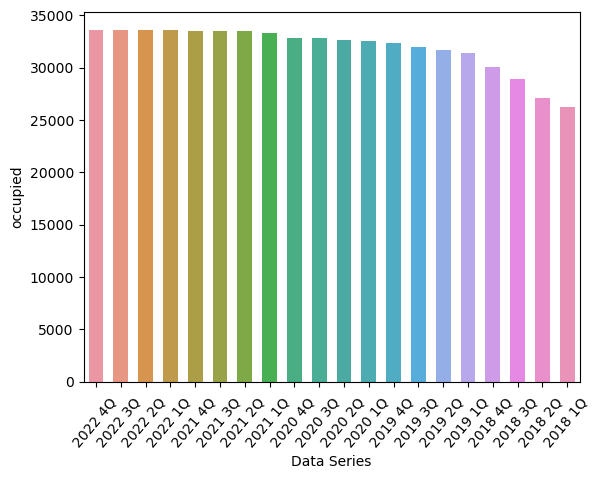

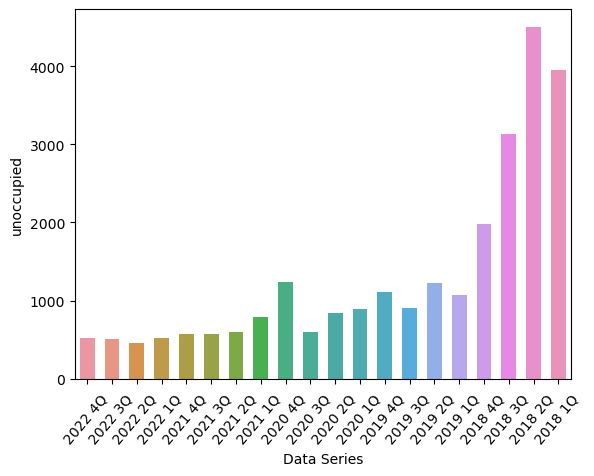

In [7]:
for i in ['occupied', 'unoccupied']:
    
    sns.barplot(rentindex_and_vacant, x='Data Series', y=i , width=0.6)
    plt.xticks(rotation =50)
    plt.show()

#  Train + Properties

In [8]:
train_and_properties = pd.merge(left=train, right=pro, on='property_key', how='left')
train_and_properties.head()

,property_key,contractDate,price,area,floorRange,propertyType,district,typeOfArea,tenure,street,project,marketSegment
0,p-c1ce31019,2018-03-01,1850000.0,102.0,36-40,Apartment,1,Strata,99 yrs lease commencing from 2005,SHENTON WAY,ONE SHENTON,CCR
1,p-a7fd7deb5,2018-03-01,1030000.0,121.0,01-05,Condominium,17,Strata,Freehold,FLORA ROAD,AVILA GARDENS,OCR
2,p-2a981615e,2018-03-01,4300000.0,300.0,01-05,Condominium,10,Strata,Freehold,MOUNT SINAI RISE,BEAVERTON COURT,CCR
3,p-2bb570b5d,2018-03-01,1400888.0,107.0,01-05,Condominium,14,Strata,Freehold,FOO KIM LIN ROAD,TROPIKA EAST,OCR
4,p-4ccd6e1db,2018-03-01,725000.0,54.0,06-10,Condominium,16,Strata,99 yrs lease commencing from 2009,BEDOK RESERVOIR ROAD,WATERFRONT GOLD,OCR


#  Train + Properties + Geo

In [9]:
train_properties_geo = pd.merge(left=train_and_properties, right=geo, on=['street', 'project', 'district'], how='inner')
train_properties_geo['contractDate'] = pd.to_datetime(train_properties_geo['contractDate'])
train_properties_geo = train_properties_geo.sort_values(by='contractDate', ignore_index=True, ascending=True)

In [10]:
train_properties_geo.head()

,property_key,contractDate,price,area,floorRange,propertyType,district,typeOfArea,tenure,street,project,marketSegment,lat,lng,num_schools_1km,num_supermarkets_500m,num_mrt_stations_500m
0,p-c1ce31019,2018-03-01,1850000.0,102.0,36-40,Apartment,1,Strata,99 yrs lease commencing from 2005,SHENTON WAY,ONE SHENTON,CCR,1.279295,103.850553,0,3,13
1,p-efaeb4d7c,2018-03-01,1320000.0,153.0,01-05,Apartment,14,Strata,99 yrs lease commencing from 1997,LORONG 39 GEYLANG,SIMS RESIDENCES,RCR,1.316074,103.891093,5,6,4
2,p-896d8c357,2018-03-01,1700000.0,153.0,01-05,Condominium,19,Strata,99 yrs lease commencing from 2010,TERRASSE LANE,TERRASSE,OCR,1.367961,103.876603,3,1,0
3,p-2d89ee033,2018-03-01,990000.0,70.0,06-10,Condominium,15,Strata,Freehold,UPPER EAST COAST ROAD,EASTERN LAGOON,OCR,1.313520,103.933094,2,0,1
4,p-86f48e239,2018-03-01,1780000.0,128.0,11-15,Condominium,15,Strata,Freehold,UPPER EAST COAST ROAD,EASTERN LAGOON,OCR,1.313520,103.933094,2,0,1


In [11]:
train_properties_geo.isna().sum()

property_key             0
contractDate             0
price                    0
area                     0
floorRange               0
propertyType             0
district                 0
typeOfArea               0
tenure                   0
street                   0
project                  0
marketSegment            0
lat                      0
lng                      0
num_schools_1km          0
num_supermarkets_500m    0
num_mrt_stations_500m    0
dtype: int64

In [12]:
datetime, years, months = convert_dataseries_datetime(interest_and_cpi)
interest_and_cpi['contractDate'] = datetime
interest_and_cpi['year'] = years
interest_and_cpi['month']= months
interest_and_cpi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data Series   60 non-null     object        
 1   InterestRate  60 non-null     float64       
 2   CPI           60 non-null     float64       
 3   contractDate  60 non-null     datetime64[ns]
 4   year          60 non-null     int64         
 5   month         60 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 3.3+ KB


In [13]:
train_properties_geo_intcpi = pd.merge(left=train_properties_geo, right=interest_and_cpi, on='contractDate', how='inner')
train_properties_geo_intcpi.head()
train_properties_geo_intcpi = train_properties_geo_intcpi.drop(['lat', 'lng'], axis=1)

In [14]:
train_properties_geo_intcpi.isna().sum()

property_key             0
contractDate             0
price                    0
area                     0
floorRange               0
propertyType             0
district                 0
typeOfArea               0
tenure                   0
street                   0
project                  0
marketSegment            0
num_schools_1km          0
num_supermarkets_500m    0
num_mrt_stations_500m    0
Data Series              0
InterestRate             0
CPI                      0
year                     0
month                    0
dtype: int64

# Data Binning

using data binning on area column in train_properties_geo_intcpi

area: 
     ->  less than 50 sq meter is considered as small
     
     ->  from 50 to 100 sq meter is considered as medium
     
     ->  from 100 to 150 sq meter is considered as medium_large
     
     ->  over 150 is considered as large area
        



In [15]:
cut_lables = ['small', 'medium', 'medium_large', 'large']
cut_bmis = [0, 50, 100, 150, 200]
train_properties_geo_intcpi['area binning'] = pd.cut(train_properties_geo_intcpi['area'], bins=cut_bmis, labels=cut_lables)
train_properties_geo_intcpi[['area','area binning']].head()

,area,area binning
0,102.0,medium_large
1,153.0,large
2,153.0,large
3,70.0,medium
4,128.0,medium_large


In [16]:
df = train_properties_geo_intcpi.copy()
df.head()

,property_key,contractDate,price,area,floorRange,propertyType,district,typeOfArea,tenure,street,...,marketSegment,num_schools_1km,num_supermarkets_500m,num_mrt_stations_500m,Data Series,InterestRate,CPI,year,month,area binning
0,p-c1ce31019,2018-03-01,1850000.0,102.0,36-40,Apartment,1,Strata,99 yrs lease commencing from 2005,SHENTON WAY,...,CCR,0,3,13,2018 Mar,0.5,99.299,2018,3,medium_large
1,p-efaeb4d7c,2018-03-01,1320000.0,153.0,01-05,Apartment,14,Strata,99 yrs lease commencing from 1997,LORONG 39 GEYLANG,...,RCR,5,6,4,2018 Mar,0.5,99.299,2018,3,large
2,p-896d8c357,2018-03-01,1700000.0,153.0,01-05,Condominium,19,Strata,99 yrs lease commencing from 2010,TERRASSE LANE,...,OCR,3,1,0,2018 Mar,0.5,99.299,2018,3,large
3,p-2d89ee033,2018-03-01,990000.0,70.0,06-10,Condominium,15,Strata,Freehold,UPPER EAST COAST ROAD,...,OCR,2,0,1,2018 Mar,0.5,99.299,2018,3,medium
4,p-86f48e239,2018-03-01,1780000.0,128.0,11-15,Condominium,15,Strata,Freehold,UPPER EAST COAST ROAD,...,OCR,2,0,1,2018 Mar,0.5,99.299,2018,3,medium_large


# One Hot

In [17]:
# By using the ['area binning', 'propertyType', 'typeOfArea', 'tenure', 'street'] as one hot encoding the lengths of the columns are 1323
# onehot  = pd.get_dummies(df[['area binning', 'propertyType', 'typeOfArea', 'tenure', 'street']], prefix_sep=['area', 'propertyType', 'tytypeOfArea', 'tenure', 'street'])
onehot  = pd.get_dummies(df['area binning'], prefix='area')

df = df.join(onehot)
df.head()

,property_key,contractDate,price,area,floorRange,propertyType,district,typeOfArea,tenure,street,...,Data Series,InterestRate,CPI,year,month,area binning,area_small,area_medium,area_medium_large,area_large
0,p-c1ce31019,2018-03-01,1850000.0,102.0,36-40,Apartment,1,Strata,99 yrs lease commencing from 2005,SHENTON WAY,...,2018 Mar,0.5,99.299,2018,3,medium_large,0,0,1,0
1,p-efaeb4d7c,2018-03-01,1320000.0,153.0,01-05,Apartment,14,Strata,99 yrs lease commencing from 1997,LORONG 39 GEYLANG,...,2018 Mar,0.5,99.299,2018,3,large,0,0,0,1
2,p-896d8c357,2018-03-01,1700000.0,153.0,01-05,Condominium,19,Strata,99 yrs lease commencing from 2010,TERRASSE LANE,...,2018 Mar,0.5,99.299,2018,3,large,0,0,0,1
3,p-2d89ee033,2018-03-01,990000.0,70.0,06-10,Condominium,15,Strata,Freehold,UPPER EAST COAST ROAD,...,2018 Mar,0.5,99.299,2018,3,medium,0,1,0,0
4,p-86f48e239,2018-03-01,1780000.0,128.0,11-15,Condominium,15,Strata,Freehold,UPPER EAST COAST ROAD,...,2018 Mar,0.5,99.299,2018,3,medium_large,0,0,1,0


In [18]:
df.columns

Index(['property_key', 'contractDate', 'price', 'area', 'floorRange',
       'propertyType', 'district', 'typeOfArea', 'tenure', 'street', 'project',
       'marketSegment', 'num_schools_1km', 'num_supermarkets_500m',
       'num_mrt_stations_500m', 'Data Series', 'InterestRate', 'CPI', 'year',
       'month', 'area binning', 'area_small', 'area_medium',
       'area_medium_large', 'area_large'],
      dtype='object')

In [19]:
# i don't know how to one hot this or filter.
df['floorRange'].unique()

array(['36-40', '01-05', '06-10', '11-15', '-', '16-20', '21-25', '31-35',
       '26-30', '61-65', '66-70', 'B1-B5', '41-45', '56-60', '71-75',
       '46-50', '51-55'], dtype=object)

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,62948.0,1.869389e+06,1.651219e+06,340000.000,1015000.000,1390000.00,2080000.000,3.628000e+07
area,62948.0,1.294018e+02,8.652082e+01,24.000,83.000,110.00,144.000,9.968000e+02
district,62948.0,1.577562e+01,6.631145e+00,1.000,11.000,16.00,20.000,2.800000e+01
num_schools_1km,62948.0,3.777229e+00,2.937796e+00,0.000,2.000,3.00,5.000,2.100000e+01
num_supermarkets_500m,62948.0,1.401379e+00,1.583575e+00,0.000,0.000,1.00,2.000,1.100000e+01
num_mrt_stations_500m,62948.0,1.943827e+00,2.145935e+00,0.000,1.000,1.00,2.000,1.400000e+01
InterestRate,62948.0,4.390265e-01,2.786669e-01,0.250,0.250,0.25,0.500,1.480000e+00
CPI,62948.0,1.025036e+02,3.557224e+00,98.833,99.807,101.07,104.439,1.111860e+02
year,62948.0,2.020355e+03,1.354188e+00,2018.000,2019.000,2021.00,2021.000,2.022000e+03
month,62948.0,6.785601e+00,3.272526e+00,1.000,4.000,7.00,10.000,1.200000e+01


# Solving business questions

# -> [A] Based on your Exploratory Data Analysis with the train datasets, 
    
#### which region(s) underwent the sharpest price increase in the training period?  
#### Why do you think the prices in those region(s) surged relatively higher?

#### According to your prediction, which region(s) will have the highest price increase in the next three months?


# Feature Engineering / EDA

## marketSegment and district  

### Core Central Region (CCR): City, Downtown Core and Sentosa : 

The Core Central Region, also known as the CCR, includes the traditional prime areas of Singapore (i.e. 1, 11, 10,  9,  2,  4,  7,  6 districts ).When looking at the Singapore district map, these districts are where most high-end, luxury properties in Singapore can be found. Many of the private residential properties in the CCR are also freehold in tenure


### Rest of Central Region (RCR): Central Areas That Are Not Part of CCR : 

According to the Singapore district map, the Rest of the Central Region, also known as the RCR, is sandwiched between the CCR and the Outside Central Region (OCR). the districts are 14, 12, 21, 15,  5,  2, 20,  3, 13,  8,  4,  1,  7, 23, 19. 
The RCR is regarded as the intermediate, or mid-tier, region in terms of pricing, between the mass market condos in the OCR region and the high-value properties in the CCR. Various buyer groups are interested in RCR properties – including investors, owner-occupiers, young families, and empty nesters.

### Outside Central Region (OCR):

Everywhere Else in Singapore. When browsing the Singapore district map, you’ll notice the Outside Central Region (OCR) is about three-quarters the size of Singapore. These are the areas where mass-market condos at the lower range of price points are mostly located, including executive condominiums (ECs).



# Question [A] -> which region(s) underwent the sharpest price increase in the training period? 

In [21]:
df['marketSegment'].unique()

array(['CCR', 'RCR', 'OCR'], dtype=object)

In [22]:
da = df.groupby('marketSegment')
CCR = da.get_group('CCR')
OCR = da.get_group('OCR')
RCR = da.get_group('RCR')

In [23]:
# this cell is used to gather price data of marketSegment and mean them in order to get them in a year to compare

ccr = OCR[(OCR['year'] == 2022) & (OCR['month'] == 12)]
ccr['month'].unique()
ccr[['price', 'month', 'year']]
int(ccr['price'].mean())

1539663

# With outlier

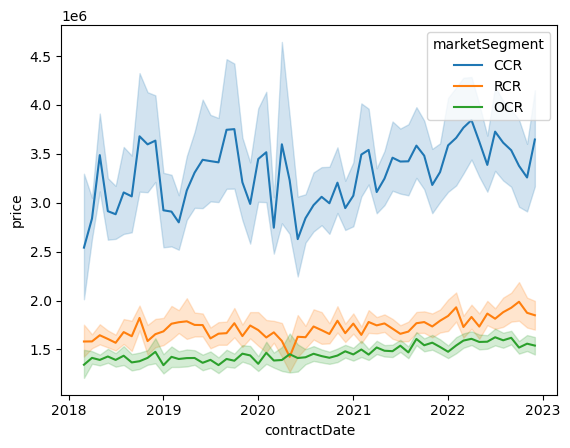

In [24]:
sns.lineplot(df, x='contractDate', y='price', hue='marketSegment')
plt.show()

### Core Central Region (CCR) :
As we can see from the above chart CCR is the highest region in Singapur. On this regard, on 2018 Mar the price was 2541224. On the other hand,on 2022 Dec the price was 3646501. 
##### Considering the difference between the prices of  2018 Mar and 2022 Dec was (2022-2018) -> 1105277 Which can seen as price was increased.

### Rest of Central Region (RCR) :
This is the second highest region for price of real estate. On 2018 Mar the price was 1581407 On the other hand, on 2022 Dec the price was 1849871.
##### Considering the difference between the prices of 2018 Mar and 2022 Dec was (2022 - 2018) -> 268464.0 Which can be seen as price increase.

### Outside Central Region (OCR):

This is the lowest region for price of real estate. On 2018 Mar the price was 1344033.On the other hand, 2022 Dec the price was 1539663. 
##### Considering the difference between the prices of 2018 Mar and 2022 Dec was (2022-2018) -> 195630 Which can be seen as price increase.


# Solving Question -[A] 1 -> which region(s) underwent the sharpest price increase in the training period? 


From the above plot and description we can clearly see that out of the three region all of them increased price more or less, during covid-19 and after covid-19. This is the price comparison between train datasets regions (CCR > RCR > OCR :- 1105277 > 268464 > 195630 )

#### That's why CCR underwent the sharpest price incerease in the training period 

# Without outlier

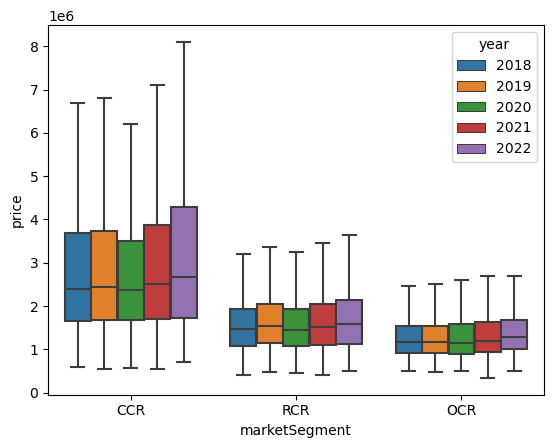

In [25]:
sns.boxplot(data=df, x='marketSegment', y='price', hue='year', showfliers =False, fliersize=3)
plt.show()

### Core Central Region (CCR) :

CCR is the highest price region for real estate. From 2018 to 2019 the price trend was steady. But during covid-19 the price droped and suddenly the price went higher than before. And In 2022 the price increased even greater than before.

### Rest of Central Region (RCR) :

RCR is the mid priced region for real estate. From 2018 to 2020 the price seems to be steady. But in 2021 and 2022 the price went a little bit higher

### Outside Central Region (OCR):

OCR is the lowest priced region for real estate. From 2018 to 2022 the price increased in a steady pace. 




# Solving Question -[A] 1 -> which region(s) underwent the sharpest price increase in the training period? 

From the above plot and description we can clearly see that out of the three region all of them increased price more or less, during covid-19 and after covid-19. But in all of them CCR the sharpest turn from 2020 to 2022.

#### That's why CCR underwent the sharpest price incerease in the training period 





# Question [A] Why do you think the prices in those region(s) surged relatively higher?

In [26]:
col = list(df.select_dtypes(include=['float', 'int']))
data = df[col].copy()
col

['price',
 'area',
 'district',
 'num_schools_1km',
 'num_supermarkets_500m',
 'num_mrt_stations_500m',
 'InterestRate',
 'CPI',
 'year',
 'month']

# Pearson

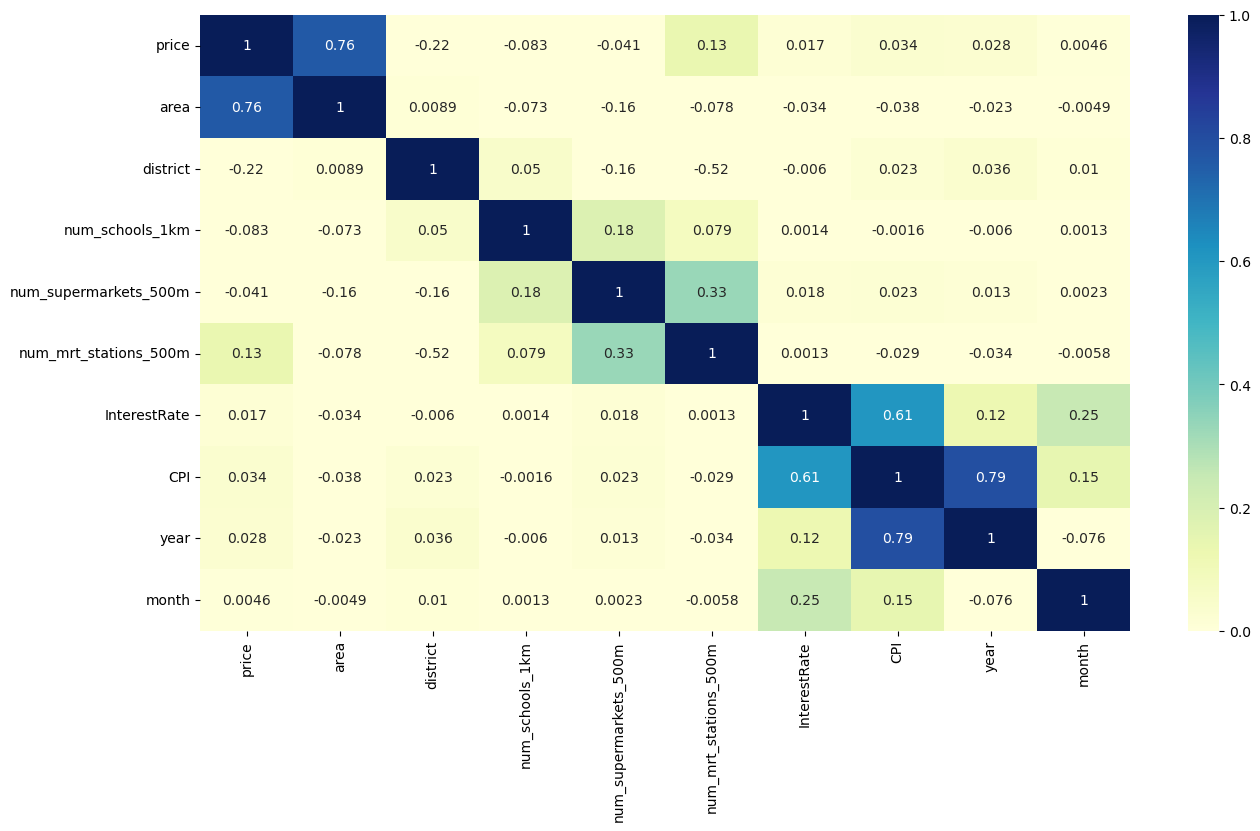

In [27]:
corr = data.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr, cmap='YlGnBu',vmax=1, vmin=0, annot=True)
plt.show()

### Relationships between df 

In this heatmap, we can see that area and price has a strong positive correlation 0.76. which means the more the price the more the size of the area . Also year and cpi, interest rate has a strong positive correlation 0.79.

We also can see that cpi and interest rate has a positive correlation 0.61  between them.

# CPI and interest

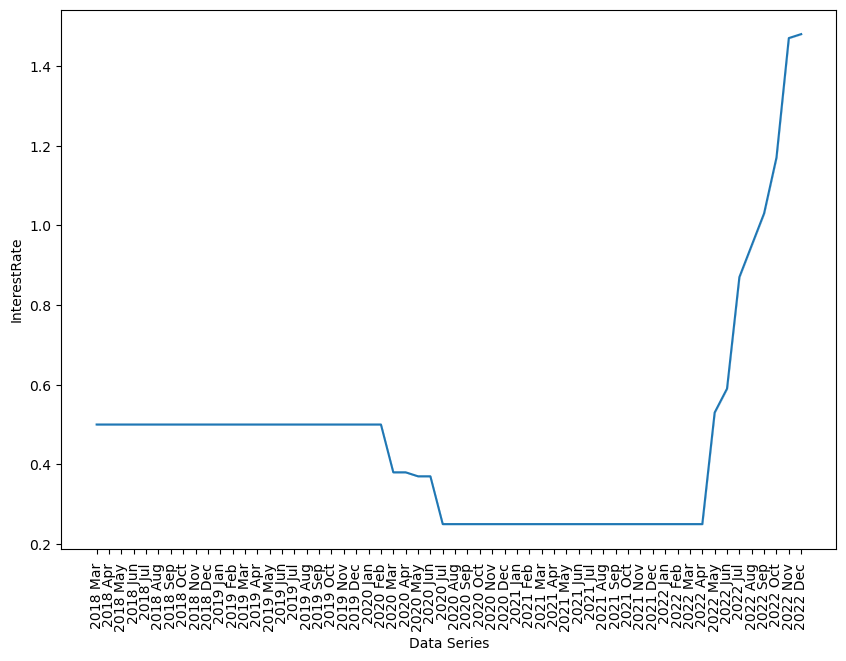

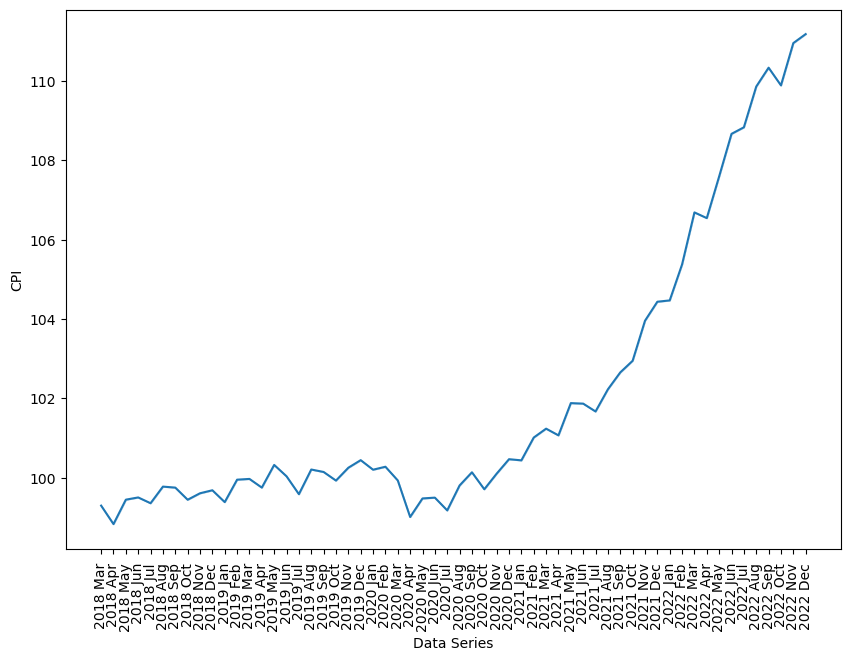

In [28]:
for i in ['InterestRate', 'CPI']:
    plt.figure(figsize=(10,7))
    
    
    sns.lineplot(df, x='Data Series', y=i)
    plt.xticks(rotation =90)
    plt.show()

In this line plot we can clearly see that ,from 2018 Mar to 2020 Feb the interest rate was stable . but from 2020 Mar to 2022 Apr due market crisis it dropped and sky rockted from 2022 May to 2022 Dec 



Another one is CPI, from 2018 Mar to 2020 Nov the CPI rate was stable but from 2020 Dec to 2022 Dec the rate increased a lot.


In both cases the prices was stable from 2018 to 2020 and increased a lot from 2020 to 2022




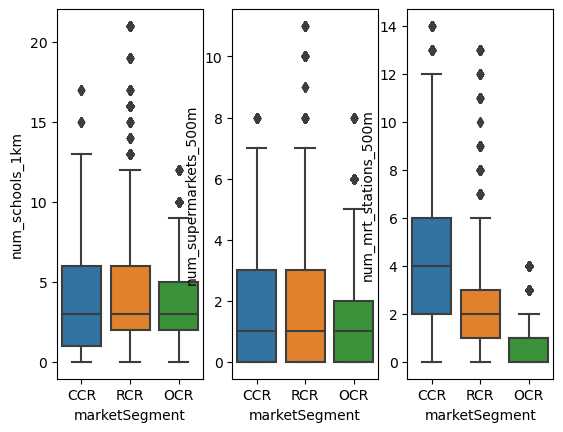

<Figure size 1000x500 with 0 Axes>

In [29]:
fig, ax = plt.subplots(1, 3)
plt.figure(figsize=(10,5))
sns.boxplot(df, x='marketSegment', y='num_schools_1km', ax=ax[0])
sns.boxplot(df, x='marketSegment', y='num_supermarkets_500m', ax=ax[1])
sns.boxplot(df, x='marketSegment', y='num_mrt_stations_500m', ax=ax[2])
plt.show()

# Solving Question -[A] 2 -> Why do you think the prices in those region(s) surged relatively higher?


In the boxplots we can see that CCR is higher in num_schools_1km,
num_supermarkets_500m, num_mrt_stations_500m than any other regions in singapur. Because of this organizations and institutions has a good influction on humans. The more this institution, schools, stations etc exists in a region the price will increase higher.



